###  Questions Posted
Answer the following questions based on the given data set:

### Importing Libraries

In [273]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [297]:
data= pd.read_excel("Influencer.xlsx")

In [298]:
data.head(5)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1.0,\ncristiano,92.0,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2.0,kyliejenner,91.0,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3.0,\nleomessi,90.0,363.9m,6.7m,915.0,0.010,3.5m,6.1b,NaN
3,4.0,\nselenagomez,93.0,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5.0,\ntherock,91.0,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [299]:
# shift column 'Name' to first position
first_column = data.pop('Channel Info')
data.insert(0, 'Channel Info', first_column)

In [300]:
data['Channel Info'] = data['Channel Info'].replace(r'\s+|\\n', ' ', regex=True) 

In [301]:
type(data['Channel Info'][0])

str

In [302]:
data

,Channel Info,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,cristiano,1.0,92.0,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,kyliejenner,2.0,91.0,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,leomessi,3.0,90.0,363.9m,6.7m,915.0,0.010,3.5m,6.1b,NaN
3,selenagomez,4.0,93.0,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,therock,5.0,91.0,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,khabib_nurmagomedov,196.0,63.0,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,danbilzerian,197.0,84.0,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,raisa6690,198.0,80.0,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,luansantana,199.0,79.0,33.5m,193.3k,865.0,0.003,82.6k,167.2m,Brazil


In [280]:
data['Channel Info']

0                 cristiano
1               kyliejenner
2                  leomessi
3               selenagomez
4                   therock
               ...         
195     khabib_nurmagomedov
196            danbilzerian
197               raisa6690
198             luansantana
199              nancyajram
Name: Channel Info, Length: 200, dtype: object

In [281]:
data.columns

Index(['Channel Info', 'Rank', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')

In [282]:
col_name = 'Followers'
data.columns.get_loc(col_name)

3

In [283]:
df = pd.DataFrame()
column_name = data.columns[3]
d = {'k': 10**3, 'm':10**6, 'b':10**9}

df['unit'] = data[column_name].astype(str).str.extract(f'({"|".join(d)})', expand=False)
df['map'] = df['unit'].map(d).fillna(1)

df['digit'] = [i.strip()[:-1] if isinstance (i,str) else i for i in data[column_name]]
##df['digit'] = [data[column_name].str.strip().str[:-1]]
##df['digit'] = data[column_name].str.extract(r'(\d+)',expand = False)
df['digit'] = df['digit'].astype(float)
df[column_name] = df['digit'].mul(df['map'])

In [284]:
df

,unit,map,digit,Followers
0,m,1000000,485.2,485200000.0
1,m,1000000,370.7,370700000.0
2,m,1000000,363.9,363900000.0
3,m,1000000,348.8,348800000.0
4,m,1000000,339.4,339400000.0
...,...,...,...,...
195,m,1000000,33.6,33600000.0
196,m,1000000,33.6,33600000.0
197,m,1000000,33.6,33600000.0
198,m,1000000,33.5,33500000.0


In [285]:
type(df['map'][1])

numpy.int64

In [286]:
type(df['digit'][1])

numpy.float64

In [287]:
data.columns.get_loc(data.columns[3])

3

In [288]:
data.head(5)

,Channel Info,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,cristiano,1.0,92.0,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,kyliejenner,2.0,91.0,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,leomessi,3.0,90.0,363.9m,6.7m,915.0,0.010,3.5m,6.1b,NaN
3,selenagomez,4.0,93.0,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,therock,5.0,91.0,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Channel Info         200 non-null    object 
 1   Rank                 200 non-null    float64
 2   Influence Score      200 non-null    float64
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(3), object(7)
memory usage: 15.8+ KB


In [303]:
def update_column(dataset,column_name):
    df = pd.DataFrame()
    d = {'k': 10**3, 'm':10**6, 'b':10**9}
    df['unit'] = dataset[column_name].str.extract(f'({"|".join(d)})', expand=False).astype(str)
    df['map'] = df['unit'].map(d).fillna(1)
    df['digit'] = [i.strip()[:-1] if isinstance (i,str) else i for i in data[column_name]]
    df['digit'] = df['digit'].astype(float)
    df[column_name] = df['digit'].mul(df['map'])
    index = dataset.columns.get_loc(column_name)
    dataset.drop(column_name,axis =1,inplace = True)
    dataset.insert(index,column_name,df[column_name])
    return dataset.head(5)

In [291]:
data.columns

Index(['Channel Info', 'Rank', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')

In [ ]:
#column_name = data.columns[3]
#update_column(data,column_name)

In [304]:
for i in [ 'Followers', 'Avg. Likes','Posts', 'New Post Avg. Likes', 'Total Likes']:
    print(i)
    update_column(data,i)

Followers
Avg. Likes
Posts
New Post Avg. Likes
Total Likes


In [305]:
data.head(5)

,Channel Info,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,cristiano,1.0,92.0,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,kyliejenner,2.0,91.0,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,leomessi,3.0,90.0,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,NaN
3,selenagomez,4.0,93.0,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,therock,5.0,91.0,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States


1. Are there any correlated features in the given dataset? If yes, state the correlation
coefficient of the pair of features which are highly correlated.

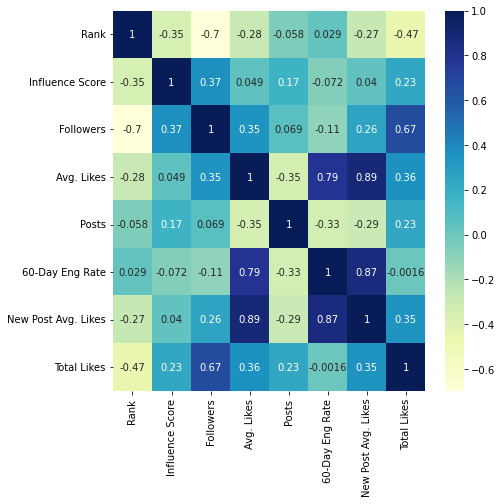

In [306]:
import seaborn as sb
plt.figure(figsize=(7, 7))
# plotting correlation heatmap
dataplot = sb.heatmap(data.iloc[:,1:-1].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

1. very High correlation b/w New Post Average Likes and Avg Likes about 89%.
2. very High correlation b/w 60-Day Eng Rate and Avg Likes about 79%.
3. High correlation between Total Likes and Followers about 67%.
4. Higher reciprocal relationship between Rank and Followers. Larger the follower base higher the influencers are ranked.

2. What is the frequency distribution of the following features?
        ○ Influence Score
        ○ Followers
        ○ Posts

#### Frequeny plot of Influence Score

In [424]:
sns.set_style("whitegrid");

Text(0.5, 1.0, 'Influence Score distribution')

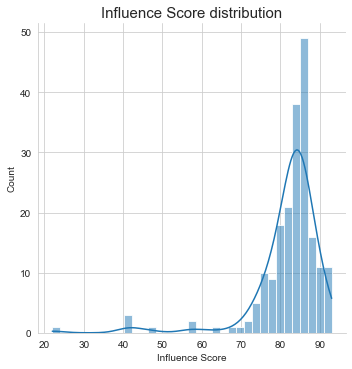

In [421]:
sns.displot(data = data, x='Influence Score', kde = True,fill=True)
plt.title('Influence Score distribution', fontdict = {'fontsize' : 15})

#### Frequeny plot of Followers

Text(0.5, 1.0, 'Followers( Million) distribution')

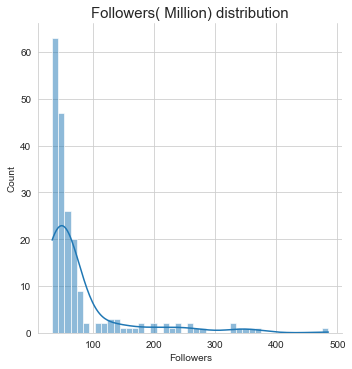

In [420]:
sns.displot(data = data, x=data['Followers']/10**6, kde = True,fill=True)
plt.title('Followers( Million) distribution', fontdict = {'fontsize' : 15})

#### Frequeny plot of Posts

Text(0.5, 1.0, 'Post distribution')

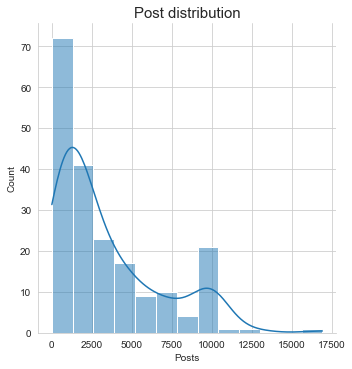

In [422]:
sns.displot(data = data, x='Posts', kde = True,fill=True)
plt.title('Post distribution', fontdict = {'fontsize' : 15})

3. Which country houses the highest number of Instagram Influencers? Please show the
count of Instagram influencers in different countries using barchart.

Text(0.5, 1.0, 'Influencers count by Country/Region')

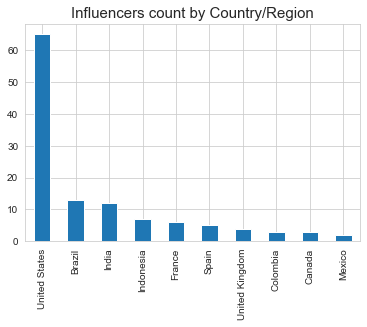

In [423]:
data['Country Or Region'].value_counts().nlargest(10).plot.bar()
plt.title('Influencers count by Country/Region', fontdict = {'fontsize' : 15})

United states houses the highest number of Influencers globally having 60 plus influencers.,  more than 6 times that of 2nd spot holder Brazil .

4. Who are the top 10 influencers in the given dataset based on the following features
        ● Followers
        ● Average likes
        ● Total Likes

##### Highest number of followers in millions

In [327]:
data.groupby('Channel Info')['Followers'].max().nlargest(10)/10**6

Channel Info
 cristiano          485.2
kyliejenner         370.7
 leomessi           363.9
 selenagomez        348.8
 therock            339.4
 arianagrande       333.0
 kimkardashian      330.7
 beyonce            276.1
 khloekardashian    273.9
 justinbieber       260.0
Name: Followers, dtype: float64

##### Highest number of Average Likes in millions

In [330]:
data.groupby('Channel Info')['Avg. Likes'].max().nlargest(10)/10**6

Channel Info
 thv             15.4
 j.m             14.4
 rkive           10.6
 cristiano        8.7
 billieeilish     8.4
kyliejenner       8.2
 leomessi         6.7
 selenagomez      6.1
 lalalalisa_m     6.0
 zendaya          5.9
Name: Avg. Likes, dtype: float64

#### Highest number of Total Likes in Billions

In [329]:
data.groupby('Channel Info')['Total Likes'].max().nlargest(10)/10**9

Channel Info
kyliejenner       57.4
 cristiano        29.1
 zendaya          20.8
 kimkardashian    19.8
 arianagrande     18.5
 badgalriri       18.0
 neymarjr         14.4
 justinbieber     14.0
 nickiminaj       12.9
 therock          12.6
Name: Total Likes, dtype: float64

5. Describe the relationship between the following pairs of features using a suitable graph
        ● Followers and Total Likes
        ● Followers and Influence Score
        ● Posts and Average likes
        ● Posts and Influence Score

In [381]:
#sns.pairplot(data, hue='Country Or Region')
import plotly.express as px

####  Followers and Total Likes

Text(0, 0.5, 'Total Likes (Billion)')

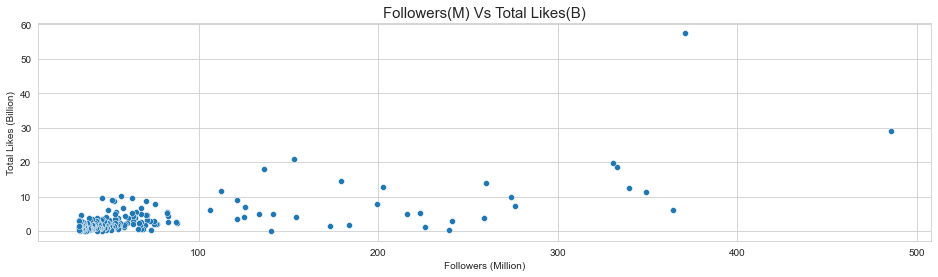

In [389]:
# Scatter plot
plt.figure(figsize=(16,4))
sns.scatterplot(data=data, x=data['Followers']/10**6, y=data['Total Likes']/10**9)
plt.title('Followers(M) Vs Total Likes(B)', fontdict = {'fontsize' : 15})
plt.xlabel('Followers (Million)')
plt.ylabel('Total Likes (Billion)')

Text(0, 0.5, 'Total Likes (Billion)')

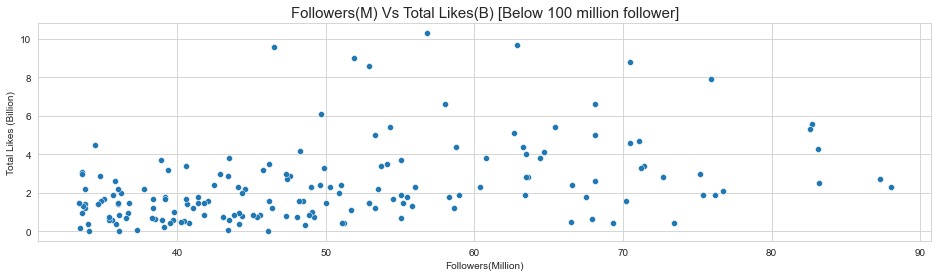

In [401]:
plt.figure(figsize=(16,4))
#Below 100 million follower of influencers
below_100m_follow = data[data['Followers']<= 10**8]
sns.scatterplot(data=data, x=below_100m_follow['Followers']/10**6, y=below_100m_follow['Total Likes']/10**9)
plt.title('Followers(M) Vs Total Likes(B) [Below 100 million follower]', fontdict = {'fontsize' : 15})
plt.xlabel('Followers(Million)')
plt.ylabel('Total Likes (Billion)')

 Below 50 million followers, Total likes are below threshold of 4 billion mark.  Below 100 million followers, Total likes are below threshold of 10 billion mark.

#### Followers and Influence Score

Text(0, 0.5, 'Influence Score')

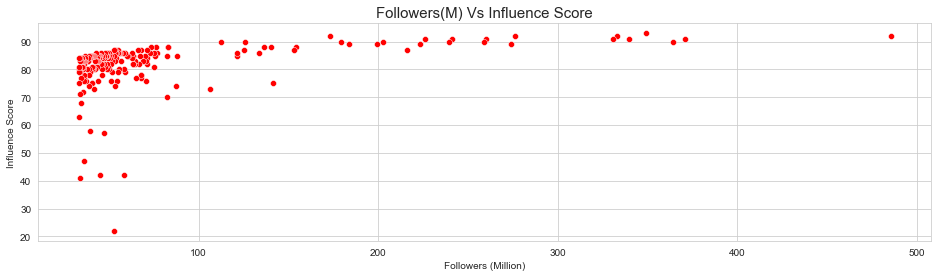

In [425]:
plt.figure(figsize=(16,4))
sns.scatterplot(data=data, x=data['Followers']/10**6, y=data['Influence Score'],color = 'r')
plt.title('Followers(M) Vs Influence Score', fontdict = {'fontsize' : 15})
plt.xlabel('Followers (Million)')
plt.ylabel('Influence Score')

Beyond 100 million followers ,Influence score hovers around 90 mark.

Text(0, 0.5, 'Influence Score')

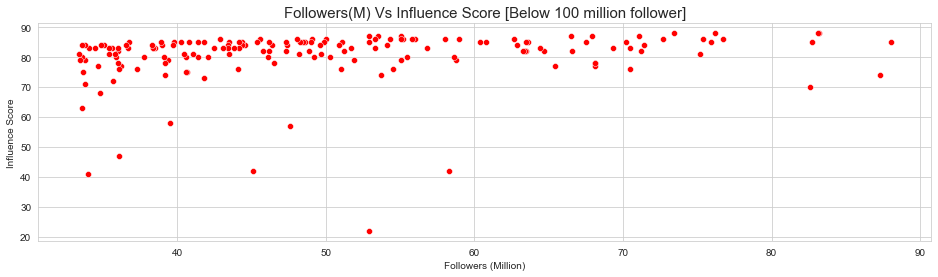

In [427]:
plt.figure(figsize=(16,4))
#Below 100 million follower of influencers
below_100m_follow = data[data['Followers']<= 10**8]
sns.scatterplot(data=below_100m_follow, x=below_100m_follow['Followers']/10**6, 
                y=below_100m_follow['Influence Score']
               ,color = 'r')
plt.title('Followers(M) Vs Influence Score [Below 100 million follower]', fontdict = {'fontsize' : 15})
plt.xlabel('Followers (Million)')
plt.ylabel('Influence Score')

Influencer with followers below 100 million  are maintaining High influence score ranging between 75 and 90. 

#### Posts and Average likes

Text(0, 0.5, 'Avg. Likes (M)')

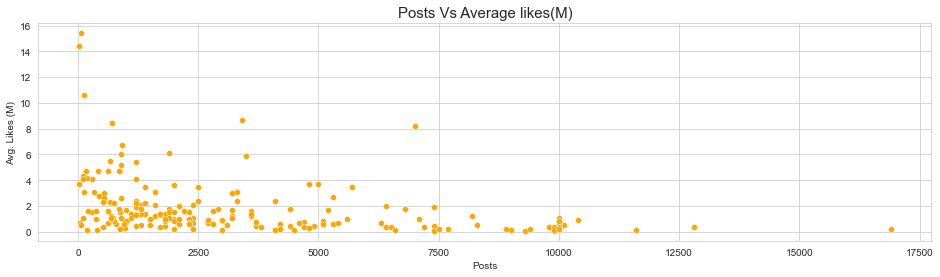

In [430]:
plt.figure(figsize=(16,4))
sns.scatterplot(data=data, x=data['Posts'], y=data['Avg. Likes']/10**6,color = 'orange')
plt.title('Posts Vs Average likes(M)', fontdict = {'fontsize' : 15})
plt.xlabel('Posts')
plt.ylabel('Avg. Likes (M)')

Text(0, 0.5, 'Avg. Likes (Million)')

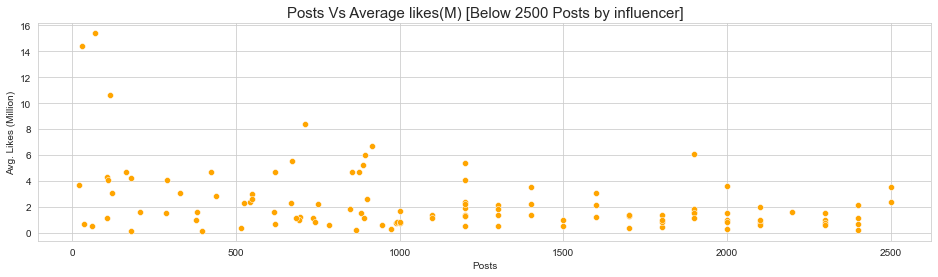

In [431]:
plt.figure(figsize=(16,4))
#Below 2500 Posts by influencer
below_2500_post = data[data['Posts']<= 2500]
sns.scatterplot(data=below_2500_post, x=below_2500_post['Posts'],
                y=below_2500_post['Avg. Likes']/10**6,
               color = 'orange')
plt.title('Posts Vs Average likes(M) [Below 2500 Posts by influencer]', fontdict = {'fontsize' : 15})
plt.xlabel('Posts')
plt.ylabel('Avg. Likes (Million)')

There are some influencers whose avg likes per post is beyond 14 million even though they have less than 100 posts so far.

#### Posts and Influence Score

Text(0, 0.5, 'Influence Score')

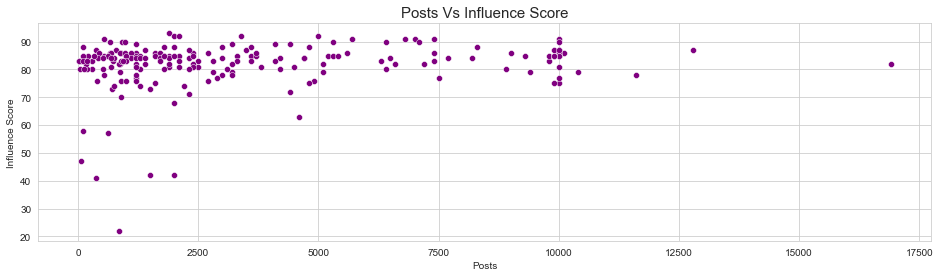

In [433]:
plt.figure(figsize=(16,4))
sns.scatterplot(data=data, x=data['Posts'], y=data['Influence Score'],color = 'purple')
plt.title('Posts Vs Influence Score', fontdict = {'fontsize' : 15})
plt.xlabel('Posts')
plt.ylabel('Influence Score')

Text(0, 0.5, 'Influence Score')

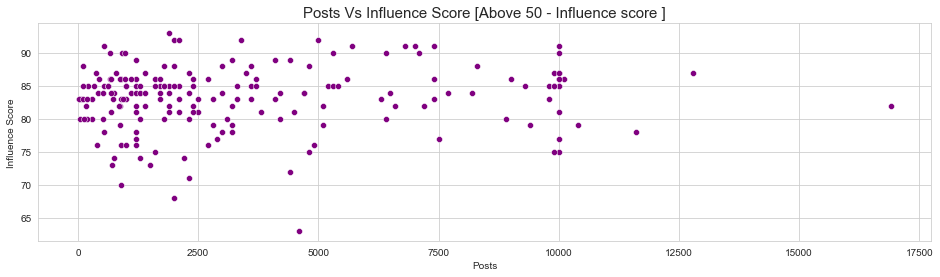

In [434]:
plt.figure(figsize=(16,4))
#Above 50 influence score
above_50_infl_score = data[data['Influence Score']>= 60]
sns.scatterplot(data=above_50_infl_score, x=above_50_infl_score['Posts'], 
                y=above_50_infl_score['Influence Score'],
               color = 'purple')
plt.title('Posts Vs Influence Score [Above 50 - Influence score ]', fontdict = {'fontsize' : 15})
plt.xlabel('Posts')
plt.ylabel('Influence Score')

#### Influence Score and New Post Avg. Likes

Text(0.5, 0, 'Influence Score')

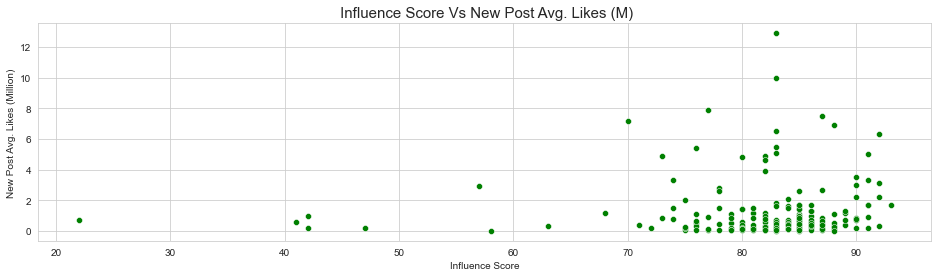

In [435]:
plt.figure(figsize=(16,4))
sns.scatterplot(data=data, x=data['Influence Score'], y=data['New Post Avg. Likes']/10**6, color ='g')
plt.title(' Influence Score Vs New Post Avg. Likes (M)', fontdict = {'fontsize' : 15})
plt.ylabel('New Post Avg. Likes (Million)')
plt.xlabel('Influence Score')

Text(0.5, 0, 'Influence Score')

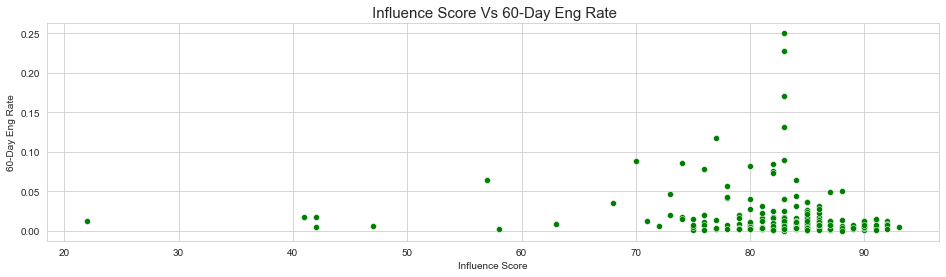

In [436]:
plt.figure(figsize=(16,4))
sns.scatterplot(data=data, x=data['Influence Score'], y=data['60-Day Eng Rate'],color ='g')
plt.title(' Influence Score Vs 60-Day Eng Rate', fontdict = {'fontsize' : 15})
plt.ylabel('60-Day Eng Rate')
plt.xlabel('Influence Score')

Here we can observe that 60-Day Engagement rate is function of New Post Avg. Likes.

####  60-Day Eng Rate Vs Average Likes

Text(0, 0.5, 'Average Likes (Million)')

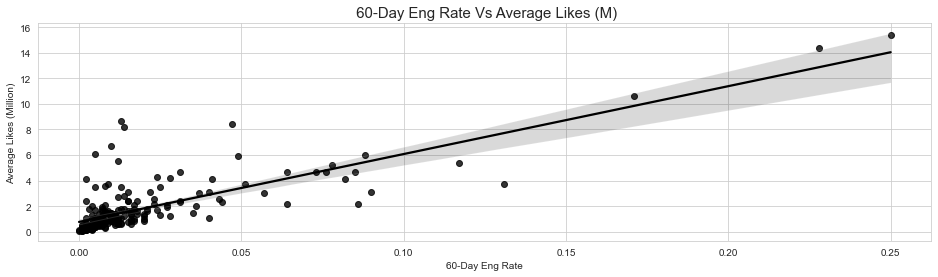

In [419]:
plt.figure(figsize=(16,4))
sns.regplot(data=data,x=data['60-Day Eng Rate'], y=data['Avg. Likes']/10**6, color ='k',marker ='o')
plt.title(' 60-Day Eng Rate Vs Average Likes (M)', fontdict = {'fontsize' : 15})
plt.xlabel('60-Day Eng Rate')
plt.ylabel('Average Likes (Million)')